## 匯入資料

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
df = pd.read_csv('E:/data/diabetes.csv')
print(df.head())

   patient_number  cholesterol  glucose  hdl_chol chol_hdl_ratio  age  gender  \
0               1          193       77        49            3,9   19  female   
1               2          146       79        41            3,6   19  female   
2               3          217       75        54              4   20  female   
3               4          226       97        70            3,2   20  female   
4               5          164       91        67            2,4   20  female   

   height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0      61     119  22,5          118            70     32   38   
1      60     135  26,4          108            58     33   40   
2      67     187  29,3          110            72     40   45   
3      64     114  19,6          122            64     31   39   
4      70     141  20,2          122            86     32   39   

  waist_hip_ratio     diabetes  
0            0,84  No diabetes  
1            0,83  No diabetes  
2            0,89

## 檢查資料

In [58]:
print(df.isnull().values.sum())
print("資料筆數:", df.shape)
print("資料的欄位名稱，分別是:", df.keys())
print("第一筆的資料內容:", df.iloc[0,::])
print("第一筆的預測目標:", df['diabetes'][0])

0
資料筆數: (390, 16)
資料的欄位名稱，分別是: Index(['patient_number', 'cholesterol', 'glucose', 'hdl_chol',
       'chol_hdl_ratio', 'age', 'gender', 'height', 'weight', 'bmi',
       'systolic_bp', 'diastolic_bp', 'waist', 'hip', 'waist_hip_ratio',
       'diabetes'],
      dtype='object')
第一筆的資料內容: patient_number               1
cholesterol                193
glucose                     77
hdl_chol                    49
chol_hdl_ratio             3,9
age                         19
gender                  female
height                      61
weight                     119
bmi                       22,5
systolic_bp                118
diastolic_bp                70
waist                       32
hip                         38
waist_hip_ratio           0,84
diabetes           No diabetes
Name: 0, dtype: object
第一筆的預測目標: No diabetes


## 處理缺值

In [59]:
print(df["diabetes"].value_counts())
df["diabetes"] = np.where(df["diabetes"]=="Diabetes" , 1, 0) 
df['chol_hdl_ratio'] = pd.to_numeric(pd.Series(df['chol_hdl_ratio']).str.replace(',','.'))
df['bmi'] = pd.to_numeric(pd.Series(df['bmi']).str.replace(',','.'))
df['waist_hip_ratio'] = pd.to_numeric(pd.Series(df['waist_hip_ratio']).str.replace(',','.'))
print(df.head())

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64
   patient_number  cholesterol  glucose  hdl_chol  chol_hdl_ratio  age  \
0               1          193       77        49             3.9   19   
1               2          146       79        41             3.6   19   
2               3          217       75        54             4.0   20   
3               4          226       97        70             3.2   20   
4               5          164       91        67             2.4   20   

   gender  height  weight   bmi  systolic_bp  diastolic_bp  waist  hip  \
0  female      61     119  22.5          118            70     32   38   
1  female      60     135  26.4          108            58     33   40   
2  female      67     187  29.3          110            72     40   45   
3  female      64     114  19.6          122            64     31   39   
4  female      70     141  20.2          122            86     32   39   

   waist_hip_ratio  diabetes  
0           

## 製作gender、waist與糖尿病的統計圖

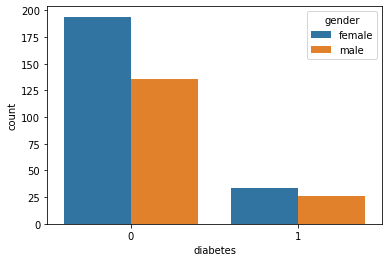

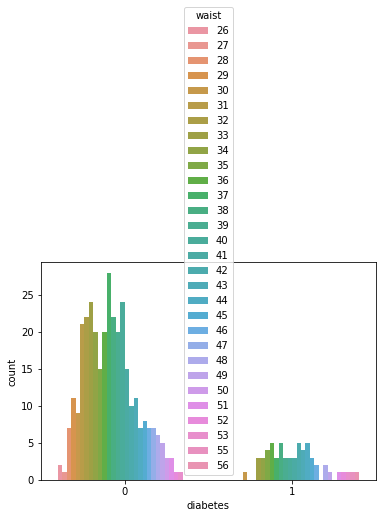

In [60]:
sns.countplot(x='diabetes',hue='gender',data=df)
plt.show()
sns.countplot(x='diabetes',hue='waist',data=df)
plt.show()

## 分割資料與資料前處理

In [61]:
X = df.drop(['diabetes'], axis=1)
LE = LabelEncoder()
X['gender'] = LE.fit_transform(X['gender'])
y = df['diabetes']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
train_X_std = sc.fit_transform(train_X)
test_X_std = sc.fit_transform(test_X)
print("訓練集的維度大小:   ", train_X_std.shape)
print("測試集的維度大小:   ", test_X_std.shape)

訓練集的維度大小:    (312, 15)
測試集的維度大小:    (78, 15)


## 建立與訓練邏輯迴歸模型

In [62]:
model = LogisticRegression()
model.fit(train_X_std, train_y)
print ('係數: ', model.coef_)
print ('截距: ',model.intercept_)

係數:  [[ 0.6765593   0.40287677  1.61299712 -0.29108643  0.00443387 -0.01000824
  -0.00429495 -0.20742432  0.21296016 -0.02867317  0.134784    0.07744963
   0.02087917  0.10473845 -0.00971382]]
截距:  [-2.69176917]


## 使用模型進行預估

In [63]:
print(model.predict(test_X_std))
print(test_y)
print(model.score(test_X_std, test_y))

[0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]
9      0
42     0
33     0
311    1
272    1
      ..
381    1
3      0
18     0
94     0
338    0
Name: diabetes, Length: 78, dtype: int32
0.8717948717948718


In [64]:
cm = confusion_matrix(test_y,model.predict(test_X_std))
print(cm)

[[58  4]
 [ 6 10]]
